In [1]:
!pip install yfinance
!pip install mplfinance

In [2]:
!pip install xgboost

In [187]:
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [193]:
tsla= yf.download('TSLA', period='5y')
tsla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-08,17.634666,17.850668,16.600000,16.704000,16.704000,202090500
2018-10-09,17.016666,17.784666,16.886667,17.520000,17.520000,180909000
2018-10-10,17.640667,17.700666,16.518000,17.125334,17.125334,192229500
2018-10-11,17.168667,17.483334,16.601999,16.815332,16.815332,122515500
2018-10-12,17.400000,17.466000,16.800667,17.252001,17.252001,108021000
...,...,...,...,...,...,...
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600


In [194]:
tsla.to_csv('tsla2023.csv')

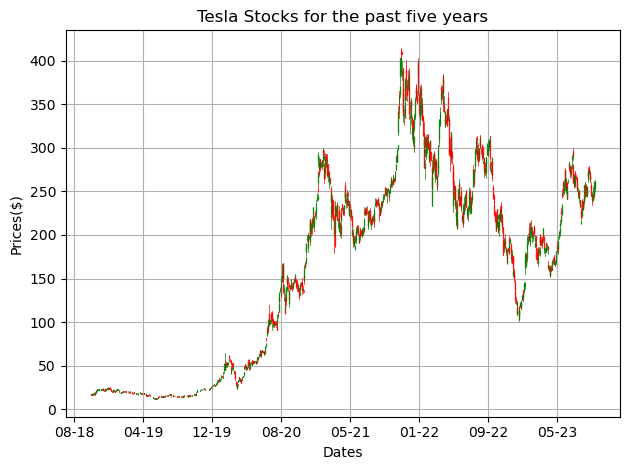

In [195]:
tsla= pd.read_csv('tsla2023.csv')
tsla= tsla[['Date', 'Open', 'High', 'Low', 'Close']]
tsla['Date']= pd.to_datetime(tsla['Date'])
tsla['Date']=  tsla['Date'].map(mpdates.date2num)

fig, ax= plt.subplots()
candlestick_ohlc(ax, tsla.values, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices($)')
ax.set_title('Tesla Stocks for the past five years')
ax.grid(True)

date_format= mpdates.DateFormatter('%m-%y')
ax.xaxis.set_major_formatter(date_format)
fig.tight_layout()
plt.show()

In [196]:
tsla= pd.read_csv('tsla2023.csv')
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,16.704000,202090500
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,17.520000,180909000
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,17.125334,192229500
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,16.815332,122515500
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,17.252001,108021000


In [197]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,16.704000,202090500
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,17.520000,180909000
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,17.125334,192229500
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,16.815332,122515500
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,17.252001,108021000


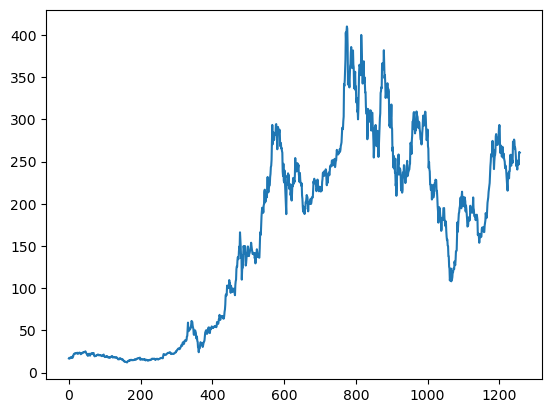

In [198]:
plt.plot(tsla['Close'])
plt.show()

In [199]:
print(tsla['Close'].shape)
print(tsla['Adj Close'].shape)

(1258,)
(1258,)


In [200]:
tsla[tsla['Close']== tsla['Adj Close']].shape

(1258, 7)

In [201]:
tsla= tsla.drop('Adj Close', axis=1)
tsla.head()

,Date,Open,High,Low,Close,Volume
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,202090500
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,180909000
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,192229500
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,122515500
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,108021000


In [202]:
fea= tsla.drop('Date', axis=1)
fea.head()

,Open,High,Low,Close,Volume
0,17.634666,17.850668,16.600000,16.704000,202090500
1,17.016666,17.784666,16.886667,17.520000,180909000
2,17.640667,17.700666,16.518000,17.125334,192229500
3,17.168667,17.483334,16.601999,16.815332,122515500
4,17.400000,17.466000,16.800667,17.252001,108021000


C:\Users\CH\AppData\Local\Temp\ipykernel_28588\3046745582.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3, i+1)


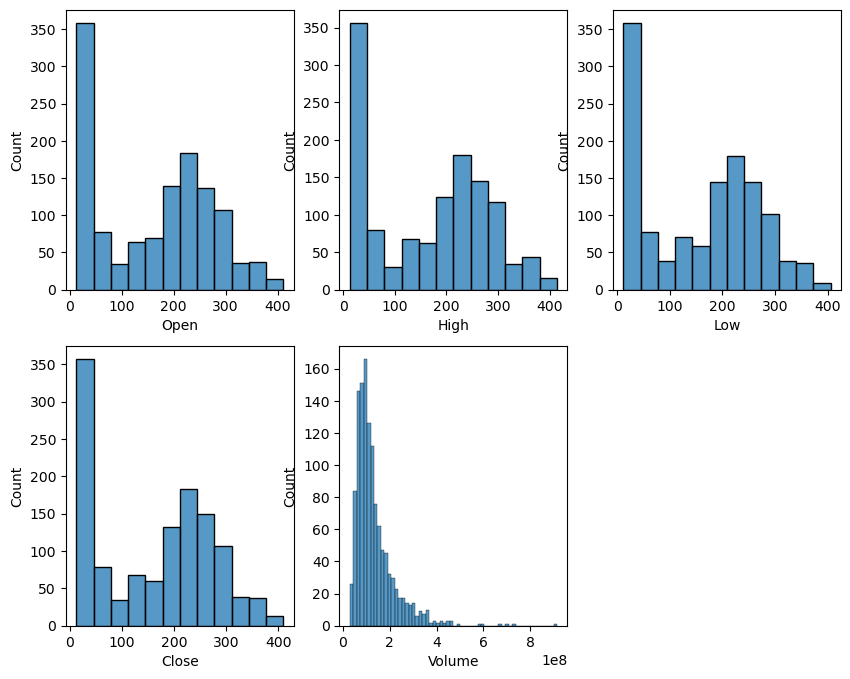

In [203]:
plt.subplots(figsize=(10,8))

for i, col in enumerate(fea):
    plt.subplot(2,3, i+1)
    sns.histplot(tsla[col])
plt.show()

C:\Users\CH\AppData\Local\Temp\ipykernel_28588\3392975558.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3, i+1)


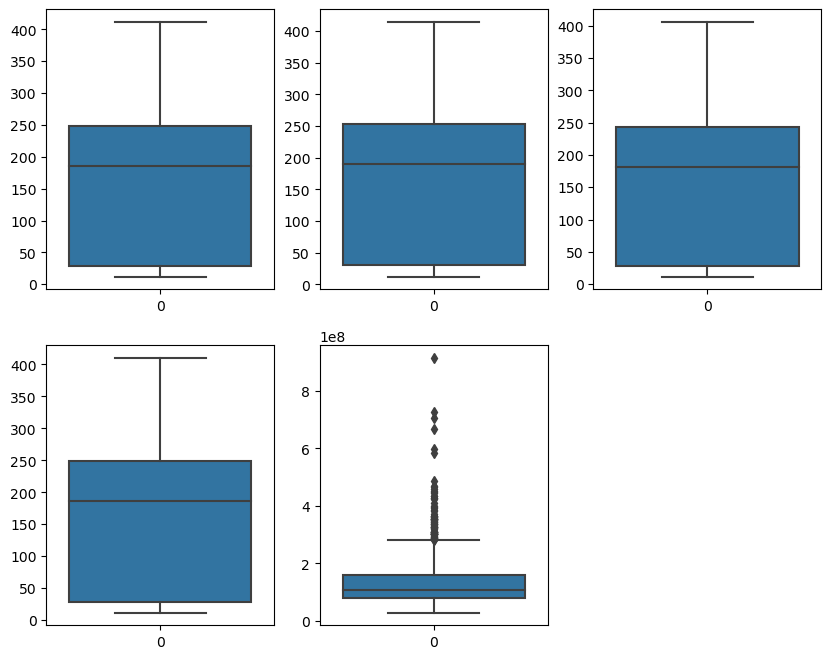

In [204]:
plt.subplots(figsize=(10,8))
for i,col in enumerate(fea):
    plt.subplot(2,3, i+1)
    sns.boxplot(tsla[col])
plt.show()

In [205]:
split= tsla['Date'].str.split('-', expand=True)
tsla['Day']= split[2].astype(int)
tsla['Month']= split[1].astype(int)
tsla['Year']= split[0].astype(int)

In [206]:
tsla.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,202090500,8,10,2018
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,180909000,9,10,2018
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,192229500,10,10,2018
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,122515500,11,10,2018
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,108021000,12,10,2018


In [207]:
tsla['Quarter_End']= np.where(tsla['Month']%3==0,1,0)
tsla.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Quarter_End
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,202090500,8,10,2018,0
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,180909000,9,10,2018,0
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,192229500,10,10,2018,0
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,122515500,11,10,2018,0
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,108021000,12,10,2018,0


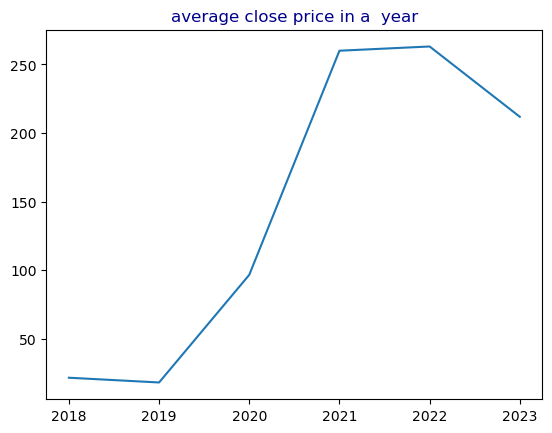

In [208]:
avg_close= tsla.groupby('Year')['Close'].mean()

plt.plot(avg_close)
plt.title('average close price in a  year', color='darkblue')
plt.show()

In [209]:
tsla.groupby('Quarter_End').mean()

C:\Users\CH\AppData\Local\Temp\ipykernel_28588\2313791628.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tsla.groupby('Quarter_End').mean()


,Open,High,Low,Close,Volume,Day,Month,Year
Quarter_End,,,,,,,,
0,159.390676,163.045620,155.454739,159.313628,1.348091e+08,15.713942,6.105769,2020.757212
1,164.251801,168.000319,160.234063,164.303887,1.337624e+08,15.826291,7.415493,2020.779343


In [210]:
tsla['Open-Close']= tsla['Open']- tsla['Close']
tsla['Low-High']= tsla['Low']- tsla['High']
tsla['Target']= np.where(tsla['Close'].shift(-1)> tsla['Close'],1,0)
tsla.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Quarter_End,Open-Close,Low-High,Target
0,2018-10-08,17.634666,17.850668,16.600000,16.704000,202090500,8,10,2018,0,0.930666,-1.250668,1
1,2018-10-09,17.016666,17.784666,16.886667,17.520000,180909000,9,10,2018,0,-0.503334,-0.897999,0
2,2018-10-10,17.640667,17.700666,16.518000,17.125334,192229500,10,10,2018,0,0.515333,-1.182667,0
3,2018-10-11,17.168667,17.483334,16.601999,16.815332,122515500,11,10,2018,0,0.353334,-0.881334,1
4,2018-10-12,17.400000,17.466000,16.800667,17.252001,108021000,12,10,2018,0,0.147999,-0.665333,1


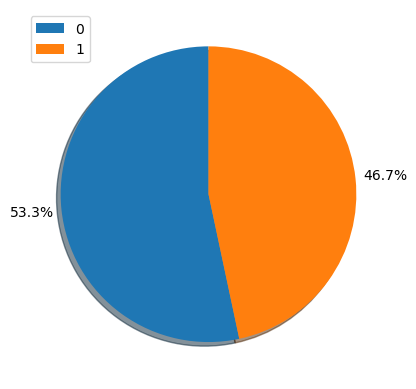

In [211]:
plt.pie(tsla['Target'].value_counts().values,
       autopct='%1.1f%%',
       pctdistance=1.2,
       labels=None,
       shadow=True,
       startangle=90,
       )
plt.legend(labels=[0,1], loc='upper left')
plt.show()

C:\Users\CH\AppData\Local\Temp\ipykernel_28588\2219600674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tsla.corr()>0.9, annot=True, cbar=False)


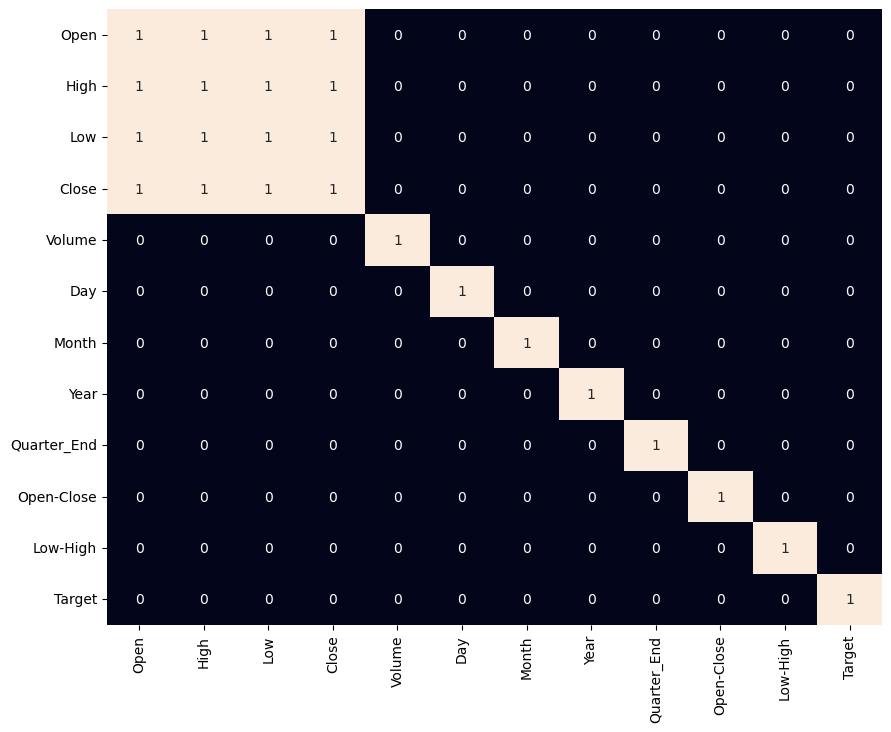

In [212]:
plt.figure(figsize=(10,8))
sns.heatmap(tsla.corr()>0.9, annot=True, cbar=False)
plt.show()

In [213]:
x= tsla[['Open-Close', 'Low-High', 'Quarter_End']]
y= tsla['Target']

In [214]:
x= StandardScaler().fit_transform(x)

In [215]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2023)
print(x_train.shape, "and", y_train.shape)
print(x_test.shape, "and", y_test.shape)

(1006, 3) and (1006,)
(252, 3) and (252,)


In [216]:
from sklearn.metrics import roc_auc_score

In [217]:
model= [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
model

[LogisticRegression(),
 SVC(kernel='poly', probability=True),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [218]:
for i in range(3):
    model[i].fit(x_train, y_train)
    print(f'{model[i]}: ')
    print('Training Accuracy:', roc_auc_score(y_train, model[i].predict_proba(x_train)[:,1]))
    print('Testing Accuracy:', roc_auc_score(y_test, model[i].predict_proba(x_test)[:,1]))

LogisticRegression(): 
Training Accuracy: 0.5245617788766325
Testing Accuracy: 0.4686597805863861
SVC(kernel='poly', probability=True): 
Training Accuracy: 0.46706605807024215
Testing Accuracy: 0.5327837300314364
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy: 0.980278

In [219]:
for i in range(3):
    model[i].fit(x_train, y_train)
    print(model[i])
    print(model[i].predict_proba(x_test)[:,1][:2])

LogisticRegression()
[0.53081729 0.54713818]
SVC(kernel='poly', probability=True)
[0.51191879 0.50558792]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
[0.514215   0.17537895]


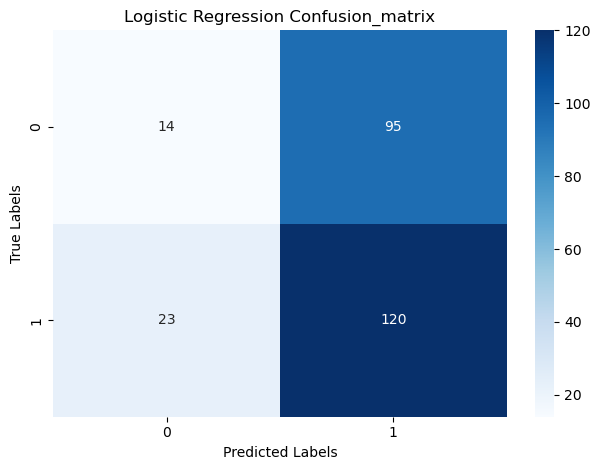

In [220]:
y_pred = model[0].predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Logistic Regression Confusion_matrix')

plt.tight_layout()
plt.show()